<a href="https://colab.research.google.com/github/sanny0703/MyNewRepo/blob/master/dp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

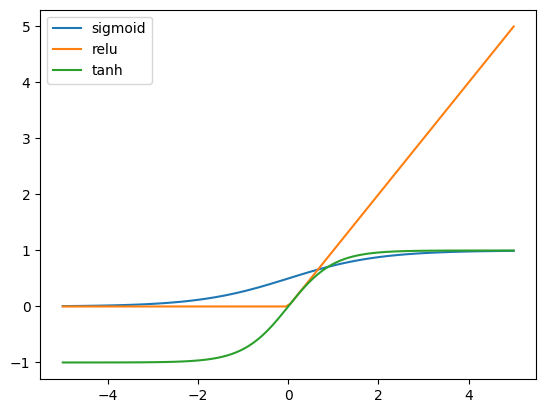

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Activation functions
z = np.linspace(-5,5,100)
plt.plot(z,tf.math.sigmoid(z),label='sigmoid')
plt.plot(z,tf.nn.relu(z),label='relu')
plt.plot(z,tf.math.tanh(z),label='tanh')
plt.legend(loc='best')
plt.show()

In [ ]:
# Dense Layer

class MyDenseLayer(tf.keras.layers.Layer):
    def __init__(self,input_dim,output_dim):
      super(MyDenseLayer,self).__init__()

      # initialize weights
      # Both these are learnable parameters, so no initialization is needed
      self.W = self.add_weight((input_dim,output_dim))
      self.b = self.add_weight((1,output_dim))

    def call(self,inputs):
      # Forward propagate the inputs
      z = tf.matmul(inputs,self.W) + self.b
      # Feed through a non-linear activation function
      output = tf.math.sigmoid(z)
      return output

# We can directly use
layer = tf.keras.layers.Dense(units=2)


# multioutput perceptron
n = 4
model = tf.keras.Sequential([
  tf.keras.layers.Dense(n,activation='sigmoid'), tf.keras.layers.Dense(2,activation='softmax')
])

In [ ]:
# Loss calculations

# 1) binary cross entropy
# cross entropy calculation using tf
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(y,predicted)
# mean of the cross entropy
loss = tf.reduce_mean(cross_entropy)


# 2) Mean Squared error

loss = tf.reduce_mean(tf.square(tf.subtract(y,predicted)))

loss = tf.keras.losses.MSE(y,predicted)

In [ ]:
# Gradient Descent

weights = tf.Variable([tf.random.normal()])
lr = 0.1 # define learning rate

while True:
  with tf.GradientTape() as g: # loop forever till convergence or stopping condition is met
    loss = compute_loss(weights)
    gradient = g.gradient(loss,weights)
  weigths = weights - lr * gradient

TypeError: Missing required positional argument

In [ ]:
# Using optimizer

model = tf.keras.Sequential([...]) # can use any layers
optimizer = tf.keras.optimizers.SGD(0.01) # can use any optimizer like Adam

while True:  # loop forever
  # forward pass through the network
  prediction = model(x)
  with tf.GradientTape() as tape:
    # compute the loss
    loss = compute_loss(y,prediction)
  # update the weights using gradient
  grads = tape.gradient(loss,model.trainable_variables)
  optimizer.apply_gradients(zip(grads,model.trainable_variables))

In [ ]:
# Overfitting

tf.keras.layers.Dropout(rate=0.5) # dropout 50% activations in a layer


In [ ]:
### Defining a network Layer ###

# n_output_nodes: number of output nodes
# input_shape: shape of the input
# x: input to the layer

class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self, n_output_nodes):
    super(OurDenseLayer, self).__init__()
    self.n_output_nodes = n_output_nodes

  def build(self, input_shape):
    d = int(input_shape[-1])
    # Define and initialize parameters: a weight matrix W and bias b
    # Note that parameter initialization is random!
    self.W = self.add_weight(name = "weight", shape=[d, self.n_output_nodes]) # note the dimensionality
    self.b = self.add_weight(name = "bias", shape=[1, self.n_output_nodes]) # note the dimensionality

  def call(self, x):
    '''TODO: define the operation for z (hint: use tf.matmul)'''
    z = tf.add(tf.matmul(x,self.W),self.b)

    '''TODO: define the operation for out (hint: use tf.sigmoid)'''
    y = tf.sigmoid(z)
    return y

# Since layer parameters are initialized randomly, we will set a random seed for reproducibility
tf.keras.utils.set_random_seed(1) # fixes the random numbers generation
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)


In [ ]:
### Defining a model using subclassing ###

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class SubclassModel(tf.keras.Model):

  # In __init__, we define the Model's layers
  def __init__(self, n_output_nodes):
    super(SubclassModel, self).__init__()
    '''TODO: Our model consists of a single Dense layer. Define this layer.'''
    self.dense_layer = Dense(units = n_output_nodes,activation='sigmoid')

  # In the call function, we define the Model's forward pass.
  def call(self, inputs):
    return self.dense_layer(inputs)

When a forward pass is made through the network, all forward-pass operations get recorded to a "tape"; then, to compute the gradient, the tape is played backwards. By default, the tape is discarded after it is played backwards; this means that a particular `tf.GradientTape` can only compute one gradient, and subsequent calls throw a runtime error. However, we can compute multiple gradients over the same computation by creating a `persistent` gradient tape.

First, we will look at how we can compute gradients using GradientTape and access them for computation. We define the simple function $ y=x^2 $ and compute the gradient:

In [ ]:
### Gradient computation with GradientTape ###

# y = x^2
# Example: x = 3.0
x = tf.Variable(3.0)

# Initiate the gradient tape
with tf.GradientTape() as tape:
  # Define the function
  y = x * x
# Access the gradient -- derivative of y with respect to x
dy_dx = tape.gradient(y, x)

assert dy_dx.numpy() == 6.0

In training neural networks, we use differentiation and stochastic gradient descent (SGD) to optimize a loss function. Now that we have a sense of how `GradientTape` can be used to compute and access derivatives, we will look at an example where we use automatic differentiation and SGD to find the minimum of $L=(x-x_f)^2$. Here $x_f$ is a variable for a desired value we are trying to optimize for; $L$ represents a loss that we are trying to  minimize. While we can clearly solve this problem analytically ($x_{min}=x_f$), considering how we can compute this using `GradientTape` sets us up nicely for future labs where we use gradient descent to optimize entire neural network losses.

Initializing x=[[-0.8475056]]


Text(0, 0.5, 'x value')

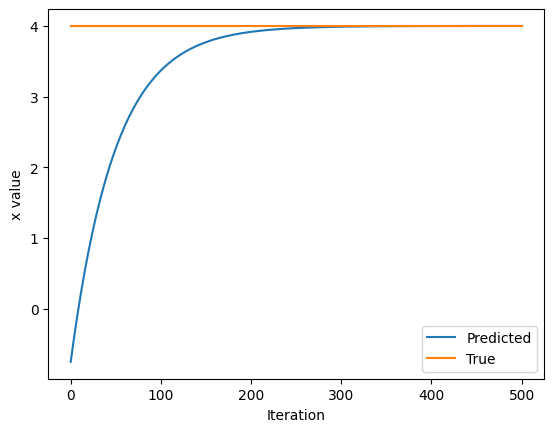

In [9]:
### Function minimization with automatic differentiation and SGD ###

# Initialize a random value for our initial x
x = tf.Variable([tf.random.normal([1])])
print("Initializing x={}".format(x.numpy()))

learning_rate = 0.01 # learning rate for SGD
history = []
# Define the target value
x_f = 4

# We will run SGD for a number of iterations. At each iteration, we compute the loss,
#   compute the derivative of the loss with respect to x, and perform the SGD update.
for i in range(500):
  # with does not create a scope like if,for and while
  with tf.GradientTape() as tape:
    '''TODO: define the loss as described above'''
    loss = (x - x_f) ** 2 # forward pass : define the current loss on the tape

  # loss minimization using gradient tape
  grad = tape.gradient(loss, x) # compute the derivative of the loss with respect to x
  new_x = x - learning_rate*grad # sgd update
  x.assign(new_x) # update the value of x
  history.append(x.numpy()[0])

# Plot the evolution of x as we optimize towards x_f!
plt.plot(history)
plt.plot([0, 500],[x_f,x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')